In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import scipy.stats as stats


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data for problem 2.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

###Handling Missing Values

In [ ]:
#checking the null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#handling missing values
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)
df['CREDIT_LIMIT'].count()
df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [ ]:
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

###Outlier detection

In [ ]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
a=q1-(1.5*iqr)
b=q3+(1.5*iqr)

In [ ]:
num=list()
for x in df.columns:
    if x in a.index:
        num.append(x)

In [ ]:
df1=df[num]

In [ ]:
df1 = df1[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]

In [ ]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.00000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12
4,817.714335,1.000000,16.00,16.00,0.0,0.00000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12
7,1823.652743,1.000000,436.20,0.00,436.2,0.00000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.0,12
8,1014.926473,1.000000,861.49,661.49,200.0,0.00000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.0,12
14,2772.772734,1.000000,0.00,0.00,0.0,346.81139,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.0,12


###Exploratory Data Analysis



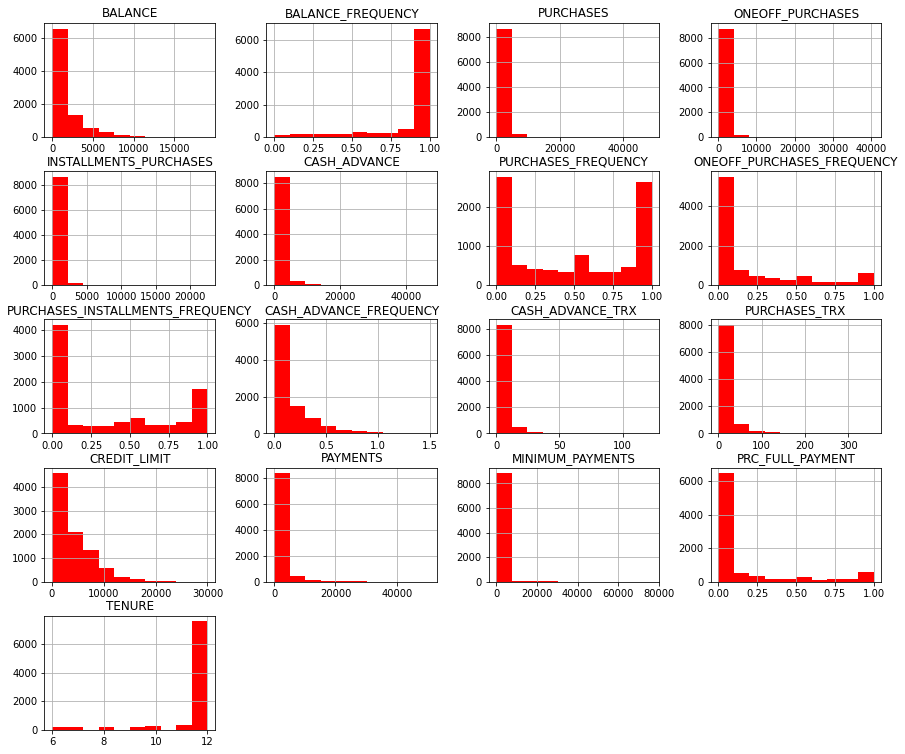

In [ ]:
df.hist(figsize=(15,13), color='red');

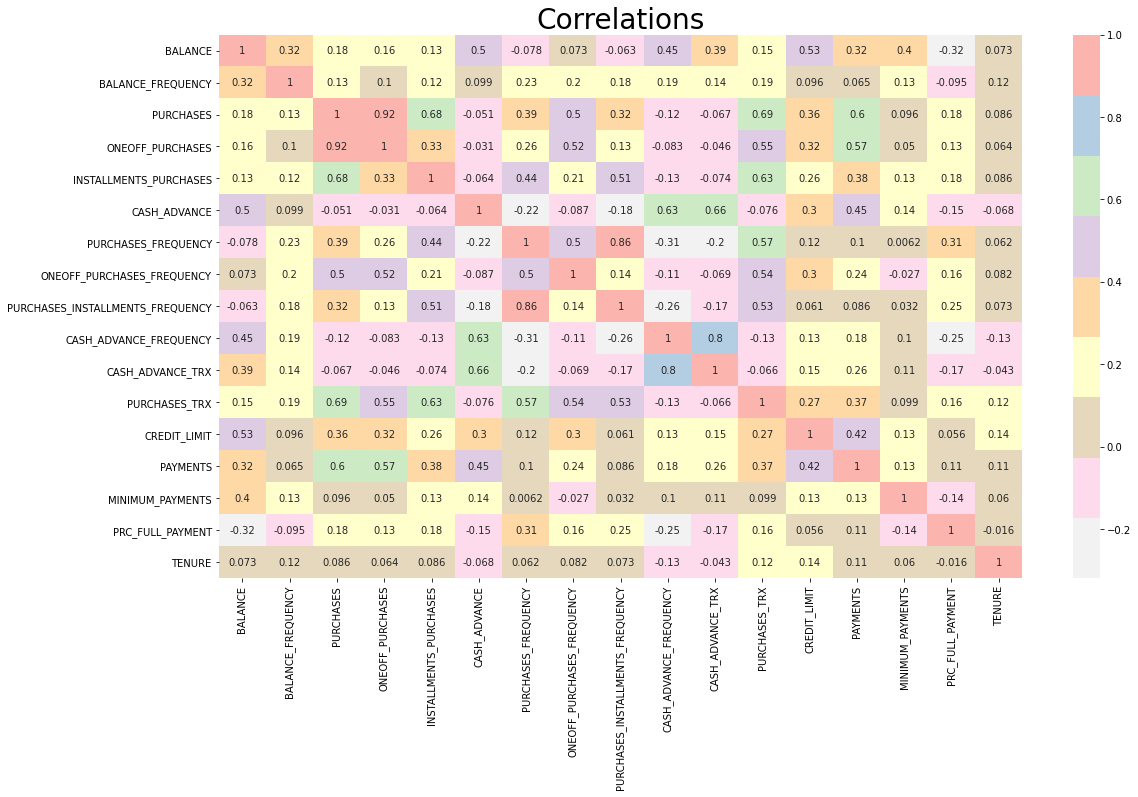

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),cmap='Pastel1_r',annot=True);
plt.title('Correlations', size = 28);

##Deriving Intelligent KPIs


####	Monthly average purchase and cash advance amount

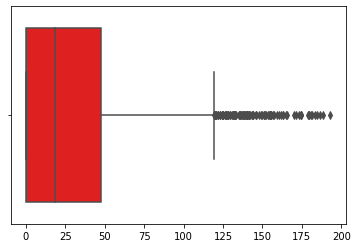

In [ ]:
df1['Monthly_avg_purchase']=df1['PURCHASES']/df1['TENURE']
df1['Monthly_avg_purchase'].head()
sns.boxplot(df1['PURCHASES']/df1['TENURE'], color='red')

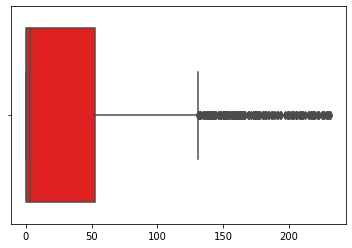

In [ ]:
df1['Monthly_cash_advance']=df1['CASH_ADVANCE']/df1['TENURE']
df1['Monthly_cash_advance'].head()
sns.boxplot(df1['CASH_ADVANCE']/df1['TENURE'], color='red')

In [ ]:
df1[df1['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

1574

####Purchases by type 

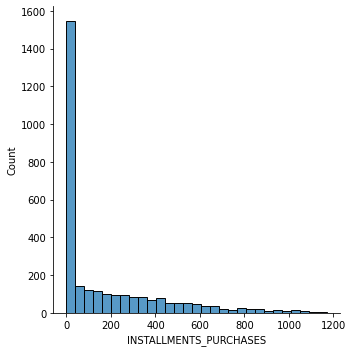

In [ ]:
df.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(10)
sns.displot(df1,x='INSTALLMENTS_PURCHASES')


####Average amount per purchase and cash advance transaction

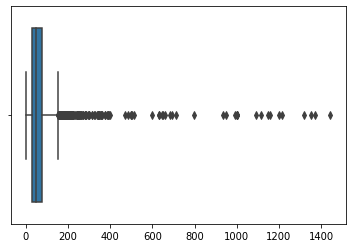

In [ ]:
df1["AVG_AMT_PER_PURCHASE"]=df1['PURCHASES']/df1['PURCHASES_TRX']
df1["AVG_AMT_PER_PURCHASE"].head()
sns.boxplot(df1['PURCHASES']/df1['PURCHASES_TRX'])

####Limit usage (balance to credit limit ratio)

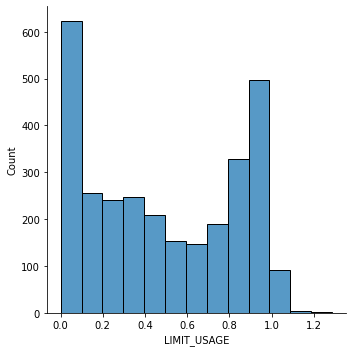

In [ ]:
df1["LIMIT_USAGE"]=df1['BALANCE']/df1['CREDIT_LIMIT']
df1["LIMIT_USAGE"].head()
sns.displot(df1,x='LIMIT_USAGE')

####Payments to minimum payments ratio etc

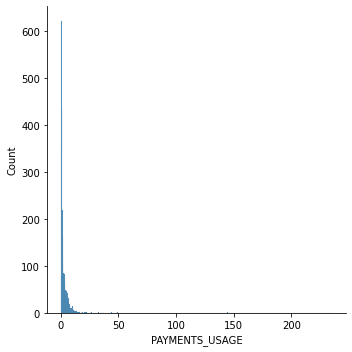

In [ ]:
df1["PAYMENTS_USAGE"]=df1['PAYMENTS']/df1['MINIMUM_PAYMENTS']
df1["PAYMENTS_USAGE"].head()
sns.displot(df1,x='PAYMENTS_USAGE')


###Insights from KPIs

As per above detail we found out that there are 4 types of purchase behaviour in the data set. 

In [ ]:
def purchase(df1):
    if (df1['ONEOFF_PURCHASES']==0) & (df1['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (df1['ONEOFF_PURCHASES']>0) & (df1['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (df1['ONEOFF_PURCHASES']>0) & (df1['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (df1['ONEOFF_PURCHASES']==0) & (df1['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [ ]:
df1['purchase_type']=df1.apply(purchase,axis=1)

In [ ]:
df1['purchase_type'].value_counts()

none                       843
both_oneoff_installment    774
istallment                 731
one_off                    638
Name: purchase_type, dtype: int64

In [ ]:
# Average payment to minimum payment ratio for each purchse type.
x=df1.groupby('purchase_type').apply(lambda x: np.mean(x['PAYMENTS_USAGE']))
type(x)
x.values

array([3.20331708, 3.09781206, 2.66443651, 2.43428512])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

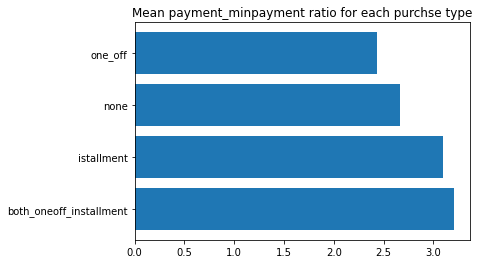

In [ ]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')


**Insight 1: Customers With Installment Purchases are Paying Dues**

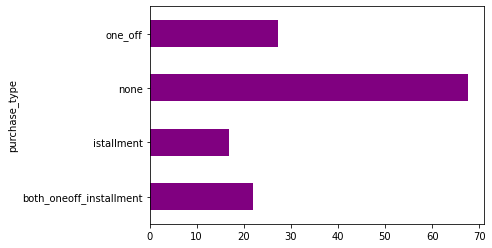

In [ ]:
df1.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh(color='purple')

**Insight 2: Customers who don't do either one-off or installment purchases take more cash on advance**

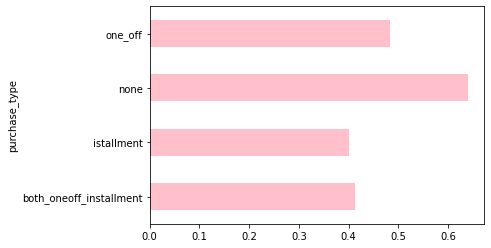

In [ ]:
df1.groupby('purchase_type').apply(lambda x: np.mean(x['LIMIT_USAGE'])).plot.barh(color='pink')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2986 entries, 0 to 8760
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           2986 non-null   float64
 1   BALANCE_FREQUENCY                 2986 non-null   float64
 2   PURCHASES                         2986 non-null   float64
 3   ONEOFF_PURCHASES                  2986 non-null   float64
 4   INSTALLMENTS_PURCHASES            2986 non-null   float64
 5   CASH_ADVANCE                      2986 non-null   float64
 6   PURCHASES_FREQUENCY               2986 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        2986 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  2986 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            2986 non-null   float64
 10  CASH_ADVANCE_TRX                  2986 non-null   int64  
 11  PURCHASES_TRX                     2986 non-null   int64  
 12  CREDIT

In [ ]:
df.to_excel(r'/content/drive/MyDrive/Colab Notebooks/Data for problem 2.xlsx')

In [ ]:
df1 = df1.drop(['purchase_type'], axis=1)
df1 = df1.drop(['AVG_AMT_PER_PURCHASE'], axis=1)

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std=pd.DataFrame(scaler.fit_transform(df1))

In [ ]:
for i in range(len(df.columns)):
    df_std.rename(columns={i:df.columns[i]},inplace=True)

In [ ]:
df_std.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,18,19,20
0,-1.132974,-2.601516,-0.632433,-0.601500,-0.316464,-0.642027,-0.605153,-0.666536,-0.582755,-0.795269,-0.733259,-0.639389,-0.905506,-0.880130,-0.940617,-0.415092,0.0,-0.632433,-0.642027,-1.281936,-0.212444
1,-0.374911,0.339842,-0.811387,-0.553358,-0.689420,-0.642027,-0.828930,-0.184397,-0.805388,-0.795269,-0.733259,-0.752641,-0.823006,-0.196194,-0.634748,-0.415092,0.0,-0.811387,-0.642027,0.549011,-0.013511
2,0.606746,0.339842,0.135668,-0.601500,1.015856,-0.642027,1.632603,-0.666536,1.866215,-0.795269,-0.733259,0.493139,-0.369261,-0.195146,0.199764,-0.415092,0.0,0.135668,-0.642027,0.867630,-0.237998
3,-0.182459,0.339842,1.094195,1.388850,0.092458,-0.642027,-0.157603,-0.184397,-0.137487,-0.795269,-0.733259,-0.299630,1.569468,-0.181923,-0.439596,-0.415092,0.0,1.094195,-0.642027,-0.984399,-0.098336
4,1.532956,0.339842,-0.847448,-0.601500,-0.689420,-0.108684,-1.052705,-0.666536,-0.805388,-0.142171,-0.320844,-0.865894,-0.080514,-0.013470,1.530163,-0.415092,0.0,-0.847448,-0.108684,1.243136,-0.307465


##Clustering

In [ ]:
cluster_df=df[["BALANCE", "PURCHASES_FREQUENCY", "CASH_ADVANCE","INSTALLMENTS_PURCHASES",
             "CREDIT_LIMIT", "PAYMENTS","PRC_FULL_PAYMENT" ]]

In [ ]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time


In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster_df)
    distortions.append(kmeanModel.inertia_)

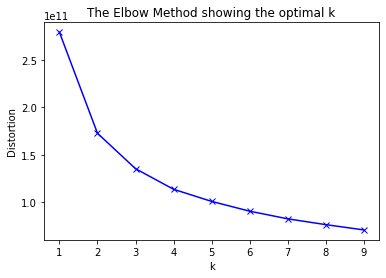

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
km = KMeans(init="random", n_clusters=4)
km.fit(cluster_df)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
labels=km.labels_

In [ ]:
df['cluster']=list(km.labels_)

In [ ]:
labels=pd.Series(data=labels,index=range(len(labels)))

In [ ]:
labels_x=list() #Extracting the various clusters formed
for i in range(10):
    labels_x.append(labels[labels.values==i])

2    5397
3    2539
1     905
0     109
Name: cluster, dtype: int64

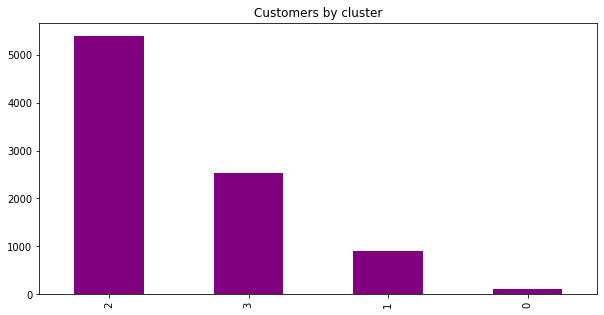

In [ ]:
df['cluster'].value_counts().plot.bar(figsize=(10,5), title='Customers by cluster', color='purple');

df['cluster'].value_counts()

###**Cluster 1**
####Bulk of the customers. Try for them to use the card more frequently.

In [ ]:
cluster_df.iloc[labels_x[0].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,109.0,5040.740171,3888.373248,4.382924,1903.688611,4419.302940,7155.328723,19043.13856
PURCHASES_FREQUENCY,109.0,0.546483,0.444540,0.000000,0.000000,0.666667,1.000000,1.00000
CASH_ADVANCE,109.0,8409.683604,8631.496707,0.000000,0.000000,7279.880364,14127.466640,47137.21176
INSTALLMENTS_PURCHASES,109.0,2517.121927,4014.580889,0.000000,0.000000,331.160000,3231.950000,15497.19000
CREDIT_LIMIT,109.0,12472.935780,4901.570667,1200.000000,9000.000000,12000.000000,16000.000000,30000.00000
PAYMENTS,109.0,20113.699508,8192.983528,10105.486720,13956.718730,18091.013470,23018.575830,50721.48336
PRC_FULL_PAYMENT,109.0,0.275862,0.321980,0.000000,0.000000,0.166667,0.416667,1.00000


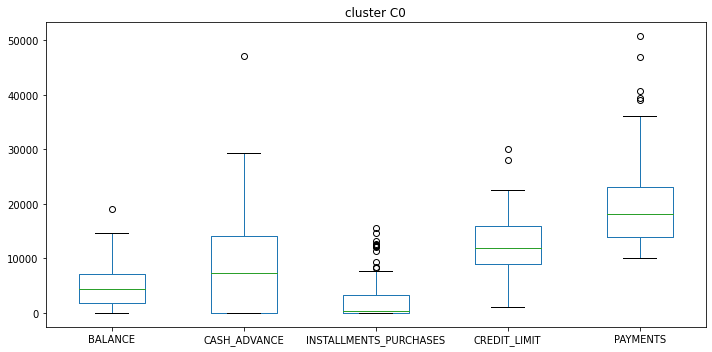

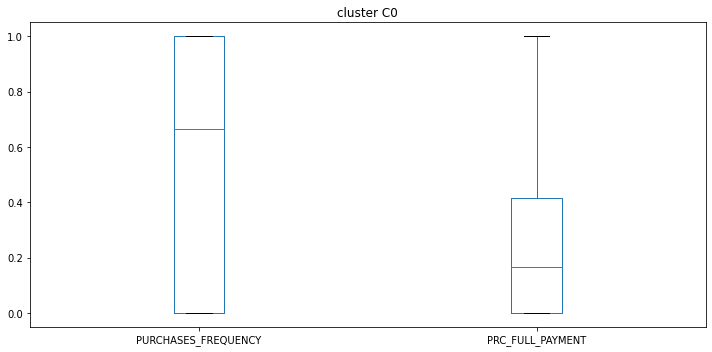

In [ ]:
cluster_C0=df[df['cluster']==0]
cluster_C0[['BALANCE','CASH_ADVANCE','INSTALLMENTS_PURCHASES',
            'CREDIT_LIMIT','PAYMENTS']].plot.box(figsize=(10,5),by='cluster',title='cluster C0',legend=True);
plt.tight_layout()
cluster_C0[['PURCHASES_FREQUENCY','PRC_FULL_PAYMENT']].plot.box(figsize=(10,5),title='cluster C0',legend=True);
plt.tight_layout()

###**Cluster 2**
####VIP clients, strategy find ways for them to buy more. Mileage program

In [ ]:
cluster_df.iloc[labels_x[1].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,905.0,5290.565936,3181.284070,1.019189,3255.151368,5418.305735,7215.745096,18495.55855
PURCHASES_FREQUENCY,905.0,0.505495,0.419079,0.000000,0.000000,0.500000,1.000000,1.00000
CASH_ADVANCE,905.0,3188.427102,3190.778422,0.000000,0.000000,2583.510846,4962.936839,14926.79059
INSTALLMENTS_PURCHASES,905.0,704.136575,1439.154322,0.000000,0.000000,99.500000,918.680000,22500.00000
CREDIT_LIMIT,905.0,11408.734304,3401.760298,4000.000000,9000.000000,10950.000000,13500.000000,30000.00000
PAYMENTS,905.0,3642.219649,2882.268470,0.000000,1543.541917,2444.123547,5147.693822,13002.30393
PRC_FULL_PAYMENT,905.0,0.091817,0.246712,0.000000,0.000000,0.000000,0.000000,1.00000


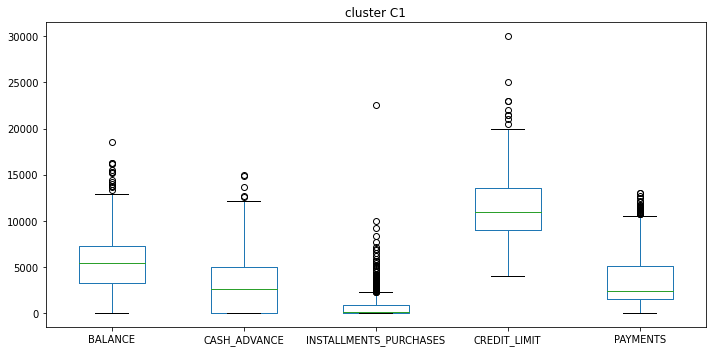

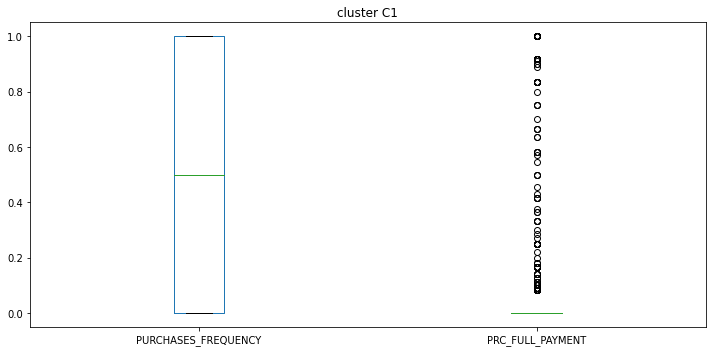

In [ ]:
cluster_C1=df[df['cluster']==1]
cluster_C1[['BALANCE','CASH_ADVANCE','INSTALLMENTS_PURCHASES',
            'CREDIT_LIMIT','PAYMENTS']].plot.box(figsize=(10,5),by='cluster',title='cluster C1',legend=True);
plt.tight_layout()
cluster_C1[['PURCHASES_FREQUENCY','PRC_FULL_PAYMENT']].plot.box(figsize=(10,5),title='cluster C1',legend=True);
plt.tight_layout()

###**Cluster 3**
####THESE CUSTOMERS USE THE CREDIT CARD FOR INSTALLMENT PURCHASES. THEY ARE FINANCIALLY WISE.

In [ ]:
cluster_df.iloc[labels_x[2].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,5397.0,780.759291,802.158691,0.0,69.190177,536.027158,1250.885289,4028.036480
PURCHASES_FREQUENCY,5397.0,0.455293,0.393115,0.0,0.083333,0.416667,0.888889,1.000000
CASH_ADVANCE,5397.0,456.312149,825.088288,0.0,0.000000,0.000000,600.188405,6718.127621
INSTALLMENTS_PURCHASES,5397.0,265.207917,447.160495,0.0,0.000000,69.890000,361.000000,4249.920000
CREDIT_LIMIT,5397.0,2170.904309,1058.794082,50.0,1200.000000,2000.000000,3000.000000,5100.000000
PAYMENTS,5397.0,882.073873,969.407958,0.0,279.038144,543.829920,1125.497981,9282.027007
PRC_FULL_PAYMENT,5397.0,0.147312,0.283095,0.0,0.000000,0.000000,0.142857,1.000000


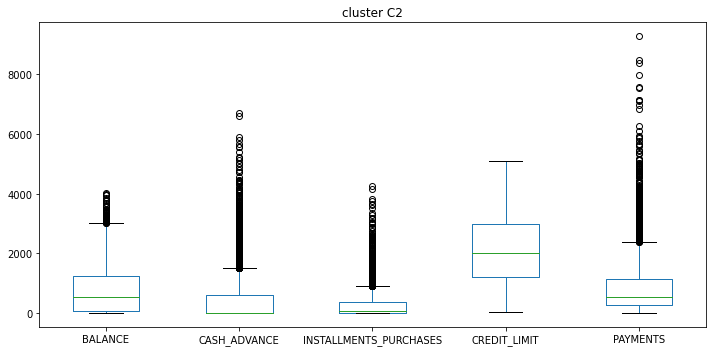

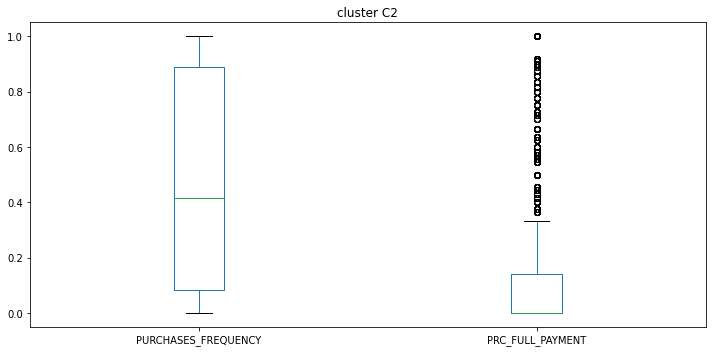

In [ ]:
cluster_C2=df[df['cluster']==2]
cluster_C2[['BALANCE','CASH_ADVANCE','INSTALLMENTS_PURCHASES',
            'CREDIT_LIMIT','PAYMENTS']].plot.box(figsize=(10,5),by='cluster',title='cluster C2',legend=True);
plt.tight_layout()
cluster_C2[['PURCHASES_FREQUENCY','PRC_FULL_PAYMENT']].plot.box(figsize=(10,5),title='cluster C2',legend=True);
plt.tight_layout()

###**Cluster 4**
####VERY PROFITABLE CUSTOMERS. THEY USE THE CARD most often.

In [ ]:
cluster_df.iloc[labels_x[3].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,2539.0,1753.008651,1688.143689,0.0,224.559012,1274.142457,2963.069429,6963.435383
PURCHASES_FREQUENCY,2539.0,0.557062,0.401524,0.0,0.087121,0.636364,1.000000,1.000000
CASH_ADVANCE,2539.0,983.063311,1603.331929,0.0,0.000000,0.000000,1562.662835,9579.677222
INSTALLMENTS_PURCHASES,2539.0,526.238046,869.123822,0.0,0.000000,145.800000,738.515000,7787.980000
CREDIT_LIMIT,2539.0,6625.838137,1830.216057,2500.0,5000.000000,6250.000000,7500.000000,13000.000000
PAYMENTS,2539.0,2072.659612,2067.563750,0.0,726.670703,1314.537349,2683.975428,14399.703180
PRC_FULL_PAYMENT,2539.0,0.184142,0.319638,0.0,0.000000,0.000000,0.200000,1.000000


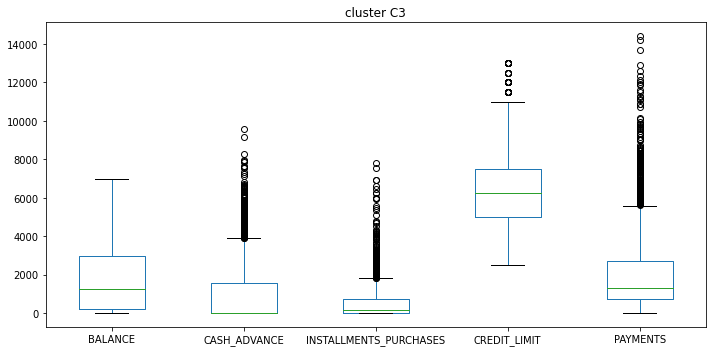

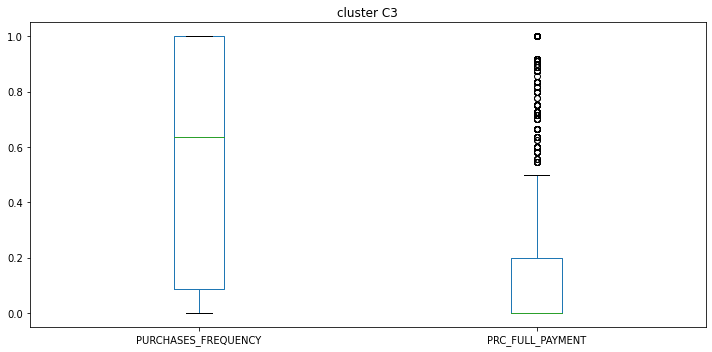

In [ ]:
#let´s characterize the Persona in the Cluster C4
cluster_C3=df[df['cluster']==3]
cluster_C3[['BALANCE','CASH_ADVANCE','INSTALLMENTS_PURCHASES',
            'CREDIT_LIMIT','PAYMENTS']].plot.box(figsize=(10,5),by='cluster',title='cluster C3',legend=True);
plt.tight_layout()
cluster_C3[['PURCHASES_FREQUENCY','PRC_FULL_PAYMENT']].plot.box(figsize=(10,5),title='cluster C3',legend=True);
plt.tight_layout()